# Simple Linear Regression

* We can use gradient descent to train a model to find known parameters.

In [1]:
using Plots

using Flux
using Flux: data

# "Backpropagation, or reverse-mode automatic differentiation, is handled by the Flux.Tracker module."
# https://github.com/FluxML/Flux.jl/blob/master/docs/src/internals/tracker.md

using Flux.Tracker
using Flux.Tracker: gradient, update!

In [33]:
1+1

2

In [2]:
losses = []

xs = collect(-5.:5.)

# Create some data.  We already know the parameters we're going to 
# try to find; the slope m is 0.5 and the y-intercept is 1.
# y = mx + b
y = .5x .+ 1

scatter(xs, y, xlabel="x", ylabel="y = 0.5x + 1", leg=false)

UndefVarError: UndefVarError: x not defined

In [3]:
# Goal, to predict sepal width from sepal length, 
# i.e. a simple linear regression.

# Want slope 'w' and y-intercept 'b', such that:
# sepal_width ≈ w*sepal_length + b


# Start with some deliberately bad guesses for W and b:
# does not converge, not sure why.
# W = param(Float64[-2.])
# b = param(Float64[14.])


# THIS FUCKING WORKS; IT GETS THE Y-INTERCEPT CORRECT!
# m = param(Float64[.5])
# b = param(Float64[-3])


# THIS FUCKING WORKS; IT GETS THE SLOPE CORRECT, WHEN LR IS 0.001
# m = param(Float64[.4])
# b = param(Float64[1])

# "We can tell Flux to treat something as a parameter via param."
m = param(Float64[.4])
b = param(Float64[2])


Tracked 1-element Array{Float64,1}:
 2.0

In [4]:
y

UndefVarError: UndefVarError: y not defined

In [5]:
# Define a model.
model(x, m, b) = m .* x .+ b


model (generic function with 1 method)

In [6]:

model(x)

UndefVarError: UndefVarError: x not defined

In [7]:
scatter(x, y, xlabel="Sepal Length, Setosa (cm)", ylabel="Sepal Width, Setosa (cm)", leg=false)
plot!(x, data(model(x)), leg=false)

UndefVarError: UndefVarError: x not defined

In [8]:
#loss(x, y) = Flux.mse(model(x), y)

In [9]:
function loss(x_, y_)
  ŷ = model(x_)
  sum((y_ .- ŷ).^2)
end


loss (generic function with 1 method)

# Start the training loop


In [10]:
push!(losses, data(loss(sepal_length, sepal_width)))

UndefVarError: UndefVarError: sepal_length not defined

In [11]:
# for current values of W and b, find the gradients with respect to the loss function.

grads = gradient(
    () -> loss(sepal_length, sepal_width), # anonymous function that takes no arguments.
    Params([W, b])
)

UndefVarError: UndefVarError: W not defined

In [12]:
@show grads[W]
@show grads[b]

UndefVarError: UndefVarError: grads not defined

In [13]:
update!(W, -0.0001.*grads[W])

UndefVarError: UndefVarError: grads not defined

In [14]:
update!(b, -0.0001.*grads[b])

UndefVarError: UndefVarError: grads not defined

In [15]:
for i in 1:100
    push!(losses, data(loss(x, y)))

    grads = gradient(
        () -> loss(x, y), # anonymous function that takes no arguments.
        Params([m, b])
    )

    # This LR works if you are just tuning the y-intercept.
#    update!(m, -0.001.*grads[m])
#    update!(b, -0.001.*grads[b])

    # THIS LR WORKS FOR JUST TUNING THE SLOPE.
    update!(m, -0.001.*grads[m])
    update!(b, -0.001.*grads[b])
end

scatter(x, y, xlabel="Sepal Length, Setosa (cm)", ylabel="Sepal Width, Setosa (cm)", leg=false)
plot!(x, data(model(x)), leg=false)

UndefVarError: UndefVarError: x not defined

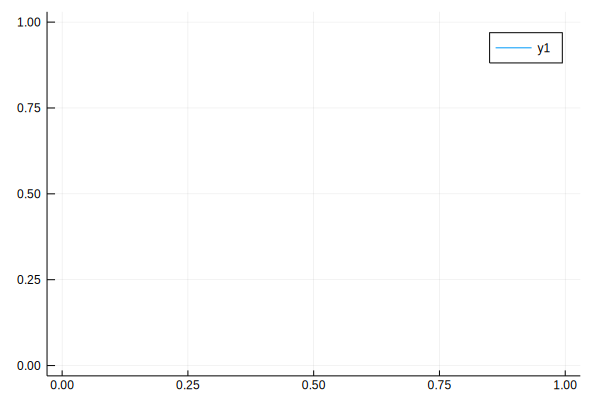

In [16]:
plot(losses)

In [17]:
losses

0-element Array{Any,1}

In [18]:
b

Tracked 1-element Array{Float64,1}:
 2.0

In [19]:
3*1.3 - 1.75

2.1500000000000004

In [20]:
W.data

UndefVarError: UndefVarError: W not defined

In [21]:
sepal_length[1:5]

UndefVarError: UndefVarError: sepal_length not defined

In [22]:
W.data .* sepal_length[1:5]

UndefVarError: UndefVarError: W not defined

In [23]:
W.data .* sepal_length

UndefVarError: UndefVarError: W not defined

In [24]:
data(model(sepal_length))


UndefVarError: UndefVarError: sepal_length not defined

In [25]:
@show W.data
@show grads[W]



@show Δ
@show Δ.data
@show -0.001.*grads[W]

UndefVarError: UndefVarError: W not defined

In [26]:
W.data .+= data(-0.001.*grads[W])

UndefVarError: UndefVarError: W not defined

In [27]:
W

UndefVarError: UndefVarError: W not defined

In [28]:
using Flux.Tracker: tracker

tracker(W).grad .= 0

UndefVarError: UndefVarError: W not defined

In [29]:
grads[W]

UndefVarError: UndefVarError: grads not defined

In [30]:
# Update the parameter and reset the gradient
@which update!(W, -0.001.*grads[W])
#update!(b, -0.001.*grads[b])




UndefVarError: UndefVarError: grads not defined

In [31]:
loss(sepal_length, sepal_width)

UndefVarError: UndefVarError: sepal_length not defined

In [32]:
# ok, the model is w and b.

# want to adjust those.

# need a loss function, to then calculate the mse
model(W, b, x) = W * x + b

Tracker.gradient(f, 2, 3, 4)

loss(x, y) = Flux.mse(model(x), y)

UndefVarError: UndefVarError: f not defined